<a href="https://colab.research.google.com/github/charan-debug/MDSC-106-Data-Visualization/blob/main/MDSC_106_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOMAIN: Banking, Marketing

• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank
has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in
expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average
single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise
effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.

DATA DICTIONARY:
1. Team: Team’s name
2. ID: Customer ID
3. Age: Customer’s approximate age.
4. CustomerSince: Customer of the bank since. [unit is masked]
5. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
6. ZipCode: Customer’s zip code.
7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
8. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
9. Level: A level associated to the customer which is masked by the bank as an IP.
10. Mortgage: Customer’s mortgage. [unit is masked]
11. Security: Customer’s security asset with the bank. [unit is masked]
12. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
13. InternetBanking: if the customer uses internet banking.
14. CreditCard: if the customer uses bank’s credit card.
15. LoanOnCard: if the customer has a loan on credit card.

1.Data Understanding and Preparation:

A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

B. Print shape and Column Names and DataTypes of both the Dataframes.

C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

D. Change Datatype of below features to ‘Object’

‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But
DataType is ‘int’/’float’ which is not expected.]


2.Data Exploration and Analysis:

A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

B. Check the percentage of missing values and impute if required.

C. Check for unexpected values in each categorical variable and impute with best suitable value.
[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected
values which needs treatment ]

# Data Understanding and Preparation

## A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

---


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("Data1.csv")
df2 = pd.read_csv("Data2.csv")

In [ ]:
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [ ]:
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


## B. Print shape and Column Names and DataTypes of both the Dataframes.

---



In [ ]:
print (df1.shape)

(5000, 8)


In [ ]:
print (df2.shape)

(5000, 7)


In [ ]:
df1.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
dtype: int64

In [ ]:
df2.isnull().sum()

ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [ ]:
df1.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000


In [ ]:
df2.describe()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

---




In [ ]:
merged_df = df1.merge(df2, on='ID')

In [ ]:
merged_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [ ]:
merged_df.shape

(5000, 14)

In [ ]:
merged_df.isnull().sum()#thereare null values in LoanOn Card

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

## D. Change Datatype of below features to ‘Object’

[‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.]


---





In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [ ]:
columns_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

merged_df[columns_to_convert] = merged_df[columns_to_convert].astype('object')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


# Data Exploration and Analysis

## A.Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

---



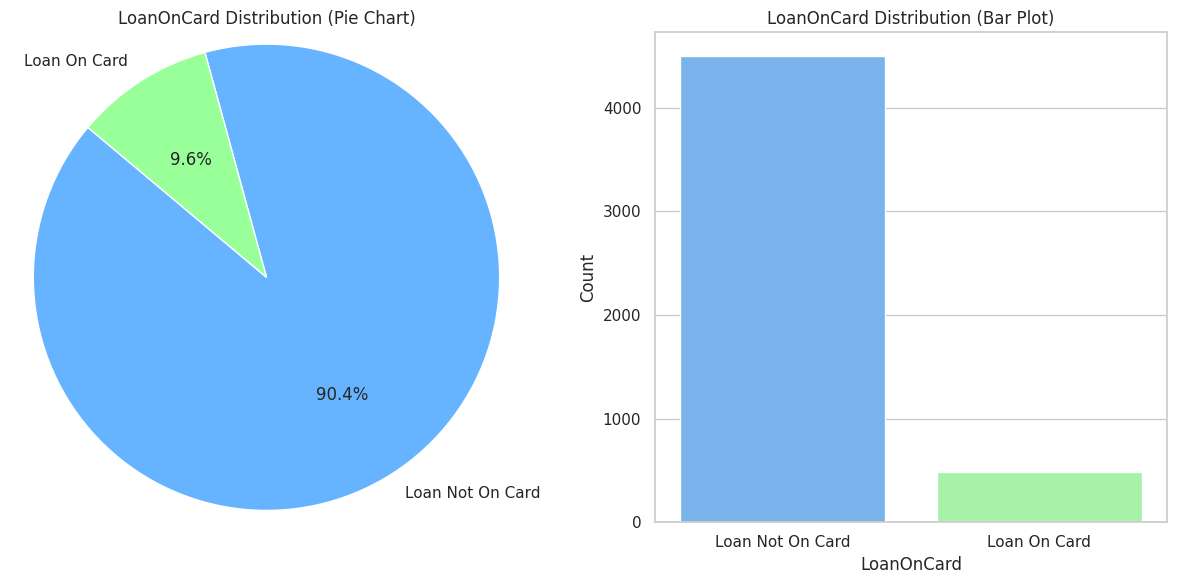

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Labels for the two classes
class_labels = ['Loan Not On Card', 'Loan On Card']

# Plot a pie chart on the left subplot
class_counts = merged_df['LoanOnCard'].value_counts()
colors = ['#66b3ff', '#99ff99']
ax1.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=colors)
ax1.axis('equal')
ax1.set_title('LoanOnCard Distribution (Pie Chart)')

# Plot a bar plot on the right subplot
sns.countplot(data=merged_df, x='LoanOnCard', palette=colors, ax=ax2)
ax2.set_title('LoanOnCard Distribution (Bar Plot)')
ax2.set_xlabel('LoanOnCard')
ax2.set_ylabel('Count')
ax2.set_xticklabels(class_labels)  # Set custom tick labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


**We can see 90% of people does not have loan on credit card**

**LoanOnCard vs CustomerSince**

---




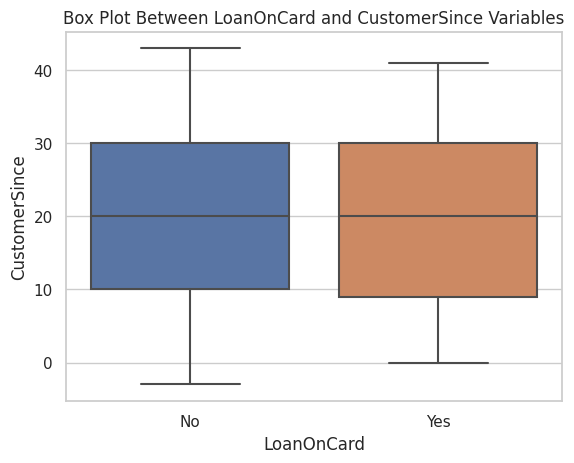

In [ ]:
import seaborn as sns

sns.boxplot(x="LoanOnCard", y="CustomerSince", data=merged_df)
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('LoanOnCard')
plt.ylabel('CustomerSince')
plt.title('Box Plot Between LoanOnCard and CustomerSince Variables')
plt.show()

**Customer of the bank since has equal distribution on loan holders and non-loan holders.**

**HighestSpend vs LoanOnCard**

---



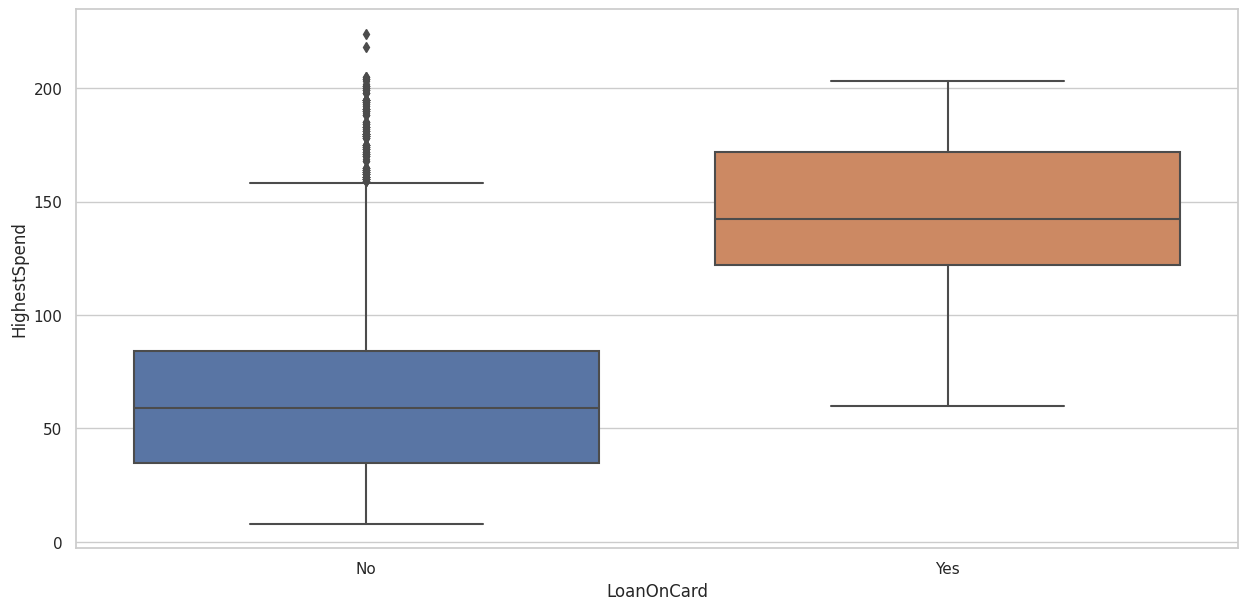

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= merged_df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

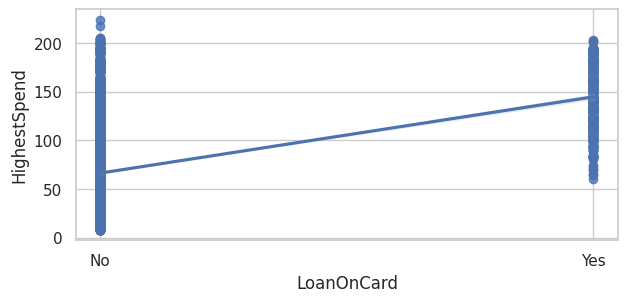

In [ ]:
figure = plt.figure(figsize=(7,3
                             ))
plt.xticks([0,1], ['No', 'Yes'])
ax = sns.regplot(x='LoanOnCard', y='HighestSpend', data= merged_df) # regression plot - scatter plot with a regression line

 People having loan on card spends more than who doesn't have

Some customer who does not have loan also spends more sometimes.


**MonthlyAverageSpend vs LoanOnCard**

---



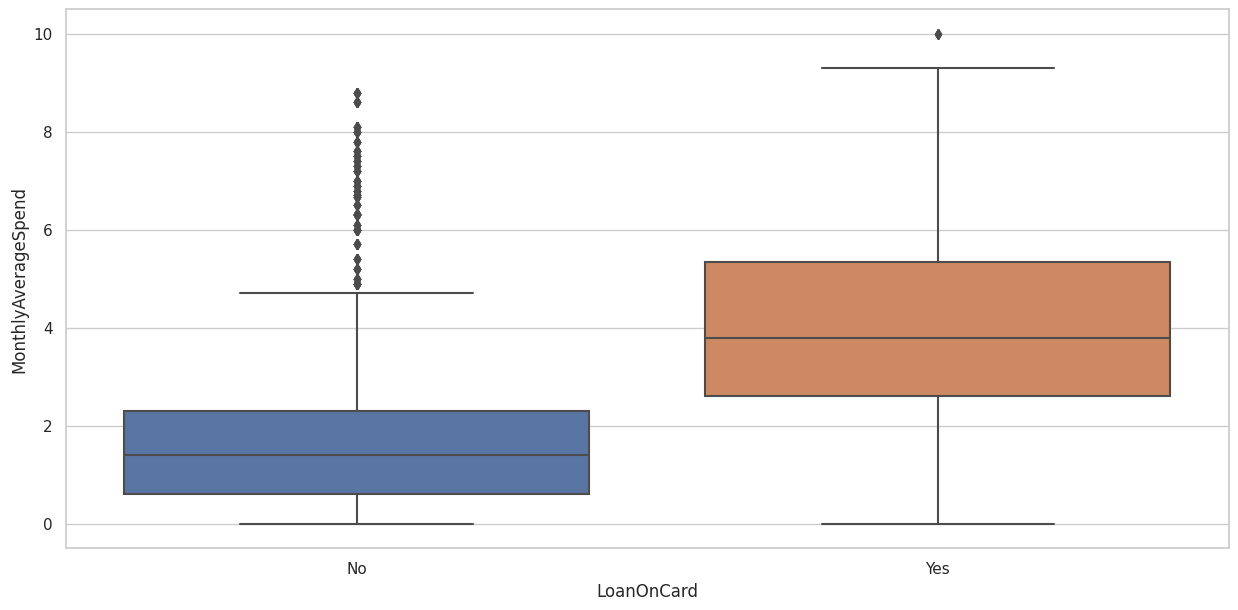

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= merged_df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

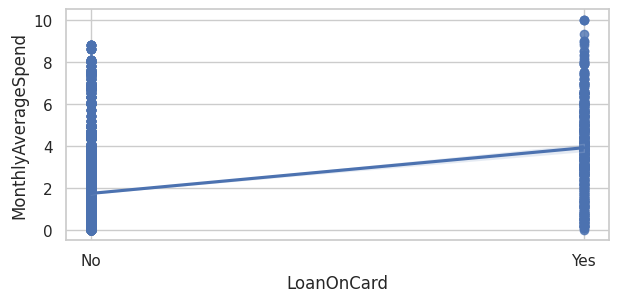

In [ ]:
figure = plt.figure(figsize=(7,3
                             ))
plt.xticks([0,1], ['No', 'Yes'])
ax = sns.regplot(x='LoanOnCard', y='MonthlyAverageSpend', data= merged_df) # regression plot - scatter plot with a regression line

**we observe monthly average spend is more for loan holders**

**Mortgage vs LoanOnCard**

---



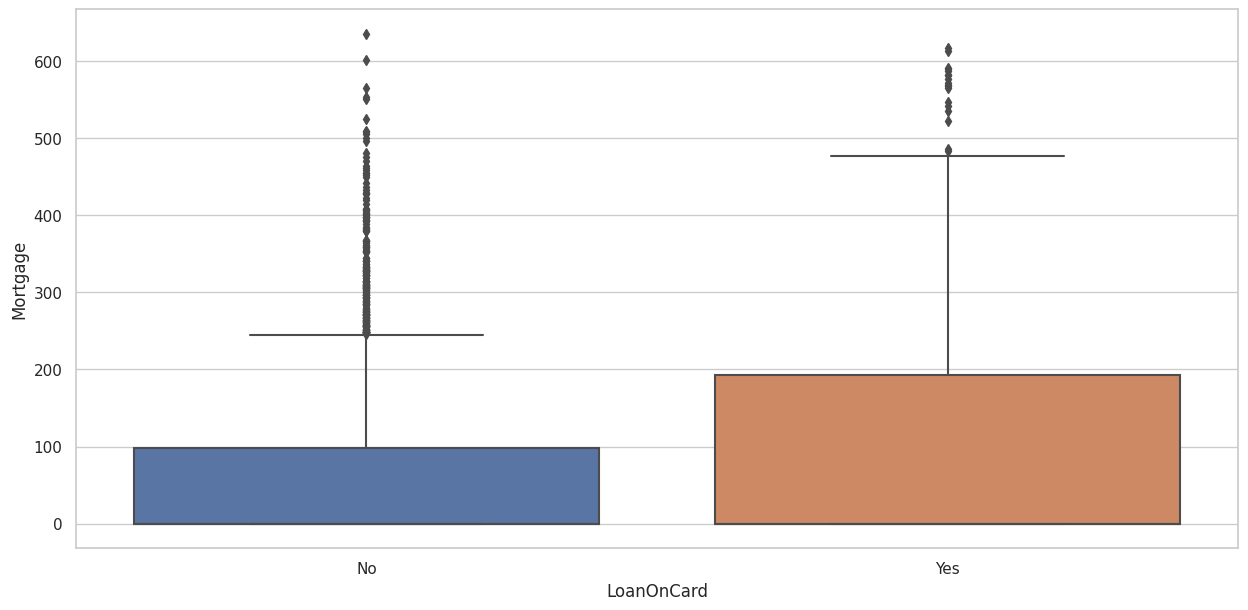

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= merged_df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Mortage value is high for loan holders

We can observe extreme value in both the cases

**Age vs LoanOnCard**

---



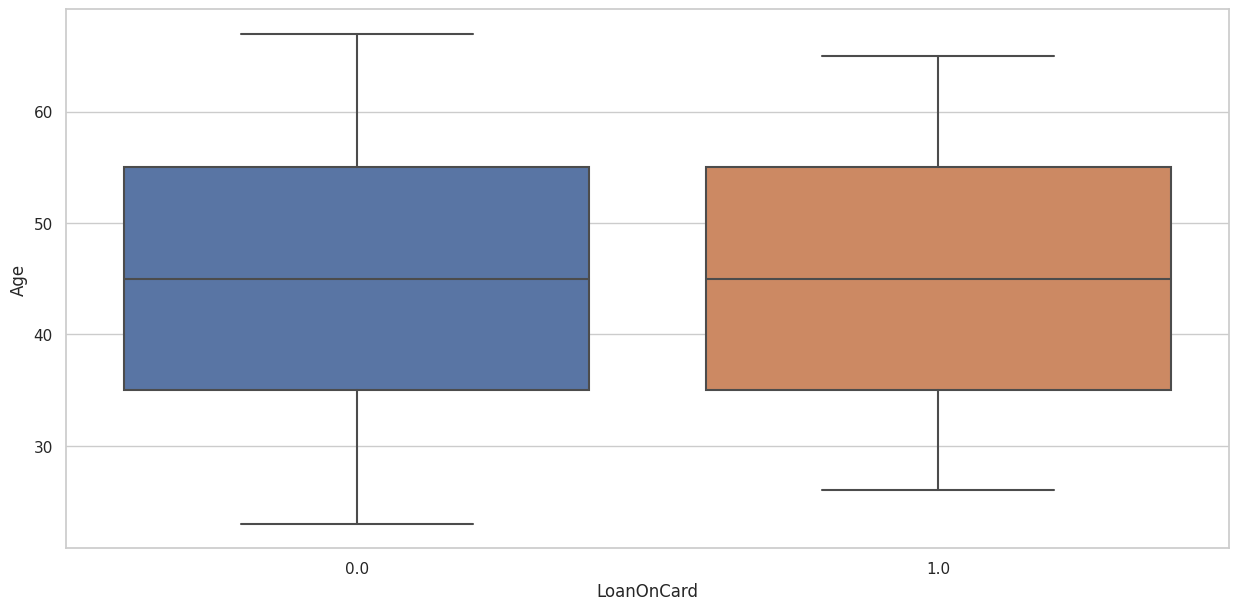

In [ ]:
plt.figure(figsize=(15,7))
plt.xticks([0,1], ['No', 'Yes'])
sns.boxplot(x='LoanOnCard', y='Age', data= merged_df)

plt.show()

**Age distribution is nearly equal for both loan holders and non-loan holders**

<ipython-input-27-44769258d87b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap


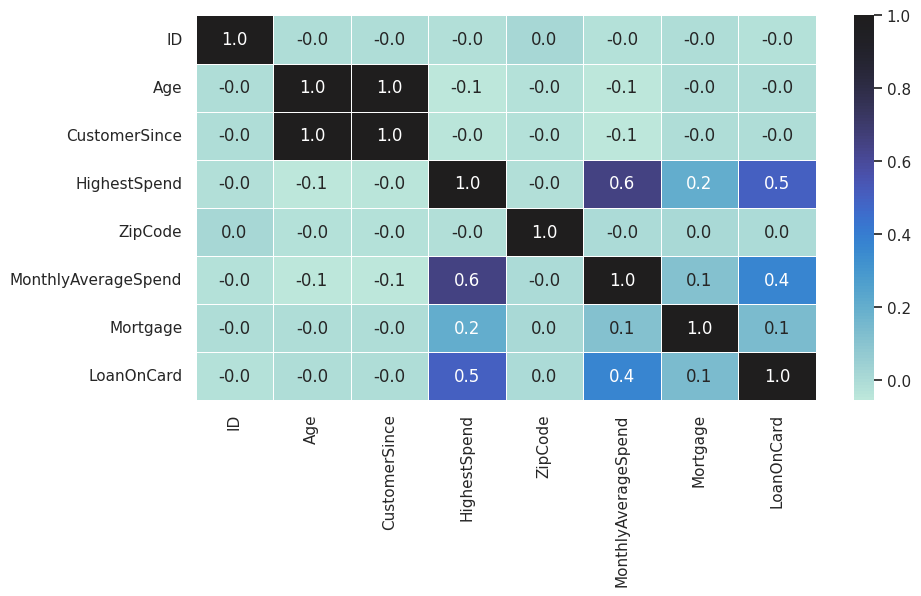

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

Age and customer since has correlation as Any one can be used for the model.

Highest spend has large correlation with monthly average spend

Mortage and highest spend has little correlation

Rest of the variables does not have any relation

## B.Check the percentage of missing values and impute if required

---




In [ ]:
missing_percentage = merged_df.isnull().sum() / len(merged_df) * 100
print(missing_percentage)


ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


In [ ]:
# Find the mode (most frequent value) of the 'Level' column
mode_level = merged_df['Level'].mode()[0]

# Replace unexpected values with the mode
merged_df['Level'] = merged_df['Level'].replace([4, 5, 6], mode_level)


In [ ]:
merged_df2 = merged_df.dropna(subset=['LoanOnCard'])



In [ ]:
merged_df2.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


In [ ]:
merged_df2.shape

(4980, 14)

In [ ]:
merged_df.shape

(5000, 14)

<ipython-input-35-ac2c37042e1f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df2.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap


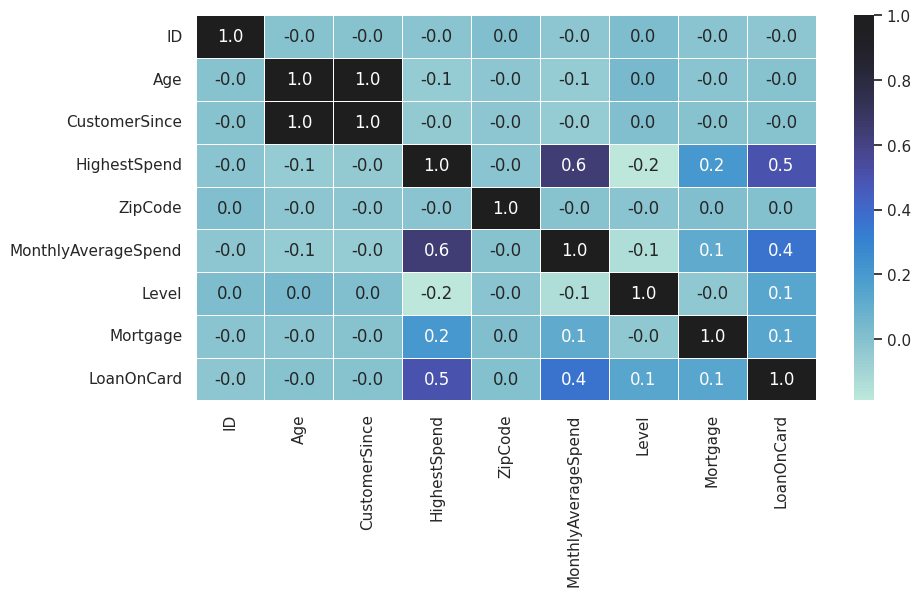

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(merged_df2.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

## C. Check for unexpected values in each categorical variable and impute with best suitable value.

---




In [ ]:
# Make a copy of the original DataFrame
merged_df3 = merged_df.copy()

# Fill missing values in 'LoanOnCard' column with 0
merged_df3['LoanOnCard'].fillna(0, inplace=True)

# Ensure 'LoanOnCard' column contains integers (0 or 1)
merged_df3['LoanOnCard'] = merged_df3['LoanOnCard'].astype(int)



In [ ]:
merged_df3.shape

(5000, 14)

In [ ]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 585.9+ KB


In [ ]:
merged_df3.isnull().sum()#thereare no null values in Loan On Card

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64